In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def create_pivot(df, timecolumn, valuecolumn, agg="mean"):
   m = df[[valuecolumn]].groupby([df[timecolumn].dt.strftime('%Y').rename("year"),df[timecolumn].dt.strftime('%m') \
                                  .rename("month")]).agg({valuecolumn:agg}) \
  .reset_index()
   result = m.pivot(index="year",columns="month",values=valuecolumn).fillna(0)
   return result

def create_mosaic(df, color):
   plt.figure(figsize=(14,11))
   im = plt.imshow(df, cmap=color)
   plt.yticks(range(len(df)),df.index.values)
   plt.xticks(range(12), ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])
   plt.colorbar(im, fraction=0.012)

In [3]:
prs = pd.read_csv("github-pr.csv.gz")
prs.createdat = pd.to_datetime(prs.createdat * 1000000, utc = True)
prs.updatedat = pd.to_datetime(prs.updatedat * 1000000, utc = True)
prs.closedat = pd.to_datetime(prs.closedat * 1000000, utc = True)
prs.firstresponse = pd.to_datetime(prs.firstresponse * 1000000, utc = True)
prs["timetofirst"] = prs.firstresponse - prs.createdat
prs["timetofirstday"] =  (prs.timetofirst /  np.timedelta64(1, 'D')).astype(float)


## Number of PRS per month

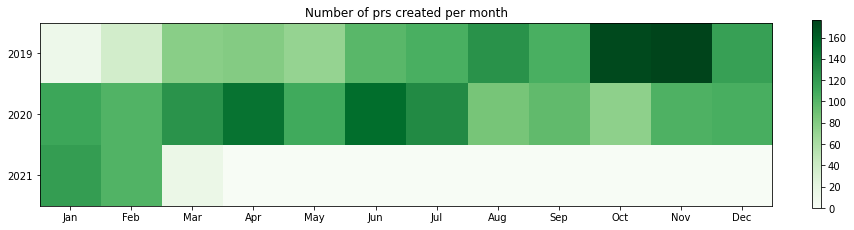

In [4]:
pivot = create_pivot(prs,"createdat", "number", "count")
create_mosaic(pivot, "Greens")
plt.title("Number of prs created per month")
plt.show()

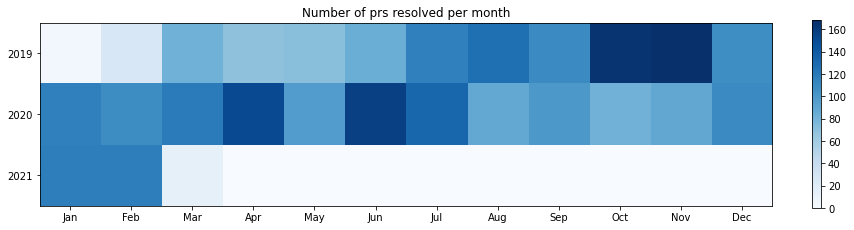

In [5]:
pivot = create_pivot(prs,"closedat", "number", "count")
create_mosaic(pivot, "Blues")
plt.title("Number of prs resolved per month")
plt.show()

## Average time until the first response on a PR

In [6]:
prs[~prs.timetofirst.isna()].timetofirst.mean()


Timedelta('2 days 05:55:12.004942965')

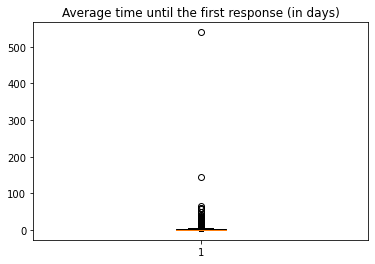

In [7]:

fig1, ax1 = plt.subplots()
ax1.set_title('Average time until the first response (in days)')
ax1.boxplot(prs[~prs.timetofirst.isna()].timetofirstday)
plt.show()


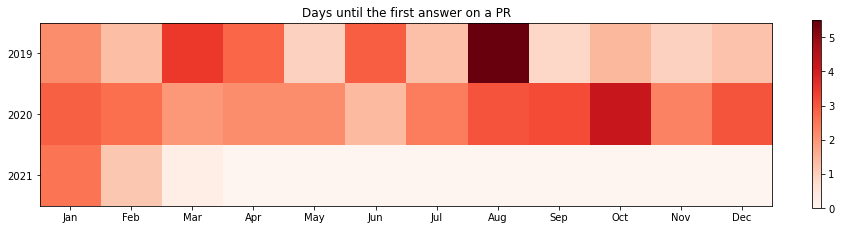

In [8]:
a = prs[~prs.timetofirst.isna()]

create_mosaic(create_pivot(a,"createdat", "timetofirstday"),"Reds")

plt.title("Days until the first answer on a PR")
plt.show()

## Top first responder users (excluding bots)

In [9]:
prs[["number"]].groupby(prs.firstresponder).count().sort_values("number", ascending=False).head(10)

,number
firstresponder,
adoroszlai,402
elek,266
bharatviswa504,227
xiaoyuyao,204
avijayanhwx,133
vivekratnavel,107
arp7,101
anuengineer,93
dineshchitlangia,84


## Users who had to wait the most for the first answer

In [10]:
prs[["timetofirstday"]].groupby(prs.author).mean().sort_values("timetofirstday", ascending=False).head(10)

,timetofirstday
author,
hgadre,110.785396
qizhu-lucas,14.870486
francis95-han,6.995185
frischHWC,5.527434
errose28,5.013785
masstter,4.839346
linyiqun,4.708731
iamabug,4.500812
yuyang733,4.237263


## Users who had to wait the less for the first answer

In [11]:
prs[["timetofirstday"]].groupby(prs.author).mean().sort_values("timetofirstday", ascending=True).head(10)

,timetofirstday
author,
Tartarus0zm,0.001418
virajjasani,0.002176
insideo,0.008061
eyanghwx,0.017546
hemanthboyina,0.026921
john28152815,0.041759
jiwq,0.045914
harindersb,0.050567
zhengchenyu,0.050718


## Average time to close the PR

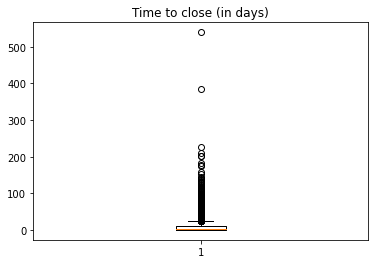

In [12]:
prs["timetoclose"] = prs.closedat - prs.createdat
prs["timetoclosedays"] = (prs.timetoclose /  np.timedelta64(1, 'D')).astype(float)
closed = prs[~prs.closedat.isna()]


fig1, ax1 = plt.subplots()
ax1.set_title('Time to close (in days)')
ax1.boxplot(closed.timetoclosedays)
plt.show()

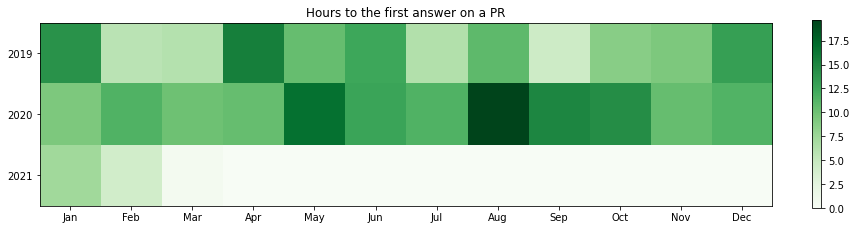

In [13]:
pivot = create_pivot(closed,"createdat", "timetoclosedays")
create_mosaic(pivot, "Greens")
plt.title("Hours to the first answer on a PR")
plt.show()

## Regular contributors by the average type of pull request lifetime (in days)

In [14]:
per_user = closed[["timetoclosedays"]].groupby(closed.author)["timetoclosedays"].agg(["mean","count"])
per_user = per_user[per_user["count"] > 20]
per_user.sort_values("mean").sort_values("mean", ascending=False)


,mean,count
author,,
cxorm,29.560776,38
maobaolong,23.027269,67
lokeshj1703,22.218305,36
amaliujia,21.600151,36
iamabug,19.071791,46
prashantpogde,18.974934,29
sadanand48,18.312549,30
captainzmc,18.080332,41
hanishakoneru,17.612548,67
